# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 1: Classic Mean Risk Optimization

## 1. Downloading the data:

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

import backtrader as bt
import numpy as np
import warnings
import matplotlib as plt

warnings.filterwarnings("ignore")
plt.rc('font', family='Pretendard')
pd.options.display.float_format = '{:.4f}'.format

In [8]:
CSI300 = pd.read_excel('000300perf_0531.xlsx', engine='openpyxl')
CSI300.set_index("日期Date", inplace=True)
CSI300.rename(columns={"收盘Close": "CSI300"}, inplace=True)
CSI300 = CSI300.rename_axis("Date")
CSI300 = CSI300['CSI300']

# Convert the index to datetime format
CSI300.index = pd.to_datetime(CSI300.index, format='%Y%m%d')
CSI300 = CSI300.to_frame()

In [9]:
# Date range
start = '2010-01-01'
end = '2023-05-31'

# Tickers of assets
ticker_labels = {
    'ticker': ['^KS200', '229200.KS', '^GSPC', '^STOXX50E', '^N225', '000300.SS', '148070.KS', '136340.KS', 'HYG', 'GC=F', 'CL=F', '114800.KS', '138230.KS', '139660.KS', '130730.KS'],
    'labels': ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
}

new_dict = dict(zip(ticker_labels["ticker"], ticker_labels["labels"]))

# Downloading data
data = yf.download(ticker_labels['ticker'], start = start, end = end)
data = data.loc[:,('Close', slice(None))]
data = data.rename(columns=new_dict)

data.columns = data.columns.droplevel(level=0)
data = data.drop('CSI300', axis=1)
data = data.merge(CSI300[['CSI300']], left_index=True, right_index=True, how='left')

# Print the merged DataFrame
data = data.sort_index(axis=1)
data = data.dropna()

assets = data.columns

[*********************100%***********************]  15 of 15 completed


In [10]:
# Calculating returns
Y = data.pct_change().dropna()
Y

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
Date,,,,,,,,,,,,,,,
2015-10-14,0.0333,-0.0124,-0.0044,-0.0006,0.0002,-0.0138,-0.0095,-0.0104,-0.0095,0.0093,-0.0564,-0.0028,0.0309,-0.0001,-0.0048
2015-10-15,0.0237,0.0082,0.0120,-0.0134,0.0002,0.0115,0.0149,0.0148,-0.0130,0.0138,-0.0056,0.0051,0.0066,0.0009,0.0024
2015-10-16,0.0136,0.0148,-0.0021,0.0019,0.0000,0.0108,0.0046,0.0081,-0.0017,0.0018,0.0190,-0.0005,-0.0036,-0.0006,0.0046
2015-10-19,0.0000,-0.0009,0.0004,0.0018,0.0000,-0.0088,0.0003,0.0022,-0.0077,0.0091,-0.0290,-0.0008,-0.0087,0.0002,0.0027
2015-10-21,-0.0172,0.0057,0.0072,-0.0074,-0.0002,0.0233,-0.0072,0.0001,0.0090,-0.0108,-0.0150,-0.0036,-0.0049,0.0000,-0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,0.0063,0.0182,0.0061,-0.0077,0.0000,0.0090,0.0002,-0.0022,-0.0059,0.0062,0.0061,0.0021,-0.0020,0.0002,0.0044
2023-05-23,-0.0141,0.0113,0.0024,-0.0011,0.0001,-0.0042,-0.0112,-0.0099,-0.0049,0.0056,0.0128,-0.0059,-0.0012,-0.0001,-0.0052
2023-05-25,-0.0160,-0.0192,-0.0052,0.0044,0.0002,-0.0051,0.0014,-0.0168,0.0113,-0.0116,-0.0148,-0.0093,-0.0149,-0.0016,-0.0077


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [17]:
import riskfolio as rp
import matplotlib.pyplot as plt

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
weights,0.0089,0.0000,0.0293,0.0000,0.0000,0.0615,0.0594,0.0000,0.4421,0.2301,0.0000,0.0000,0.0995,0.0691,0.0000


### 3.4 Calculate Optimal Portfolios for Several Risk Measures

In [16]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [18]:
Asset = ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
Class = ['DS', 'DS', 'FS', 'FS', 'FS', 'FS', 'Bond', 'Bond', 'Bond', 'COM', 'COM', 'Inverse', 'FX', 'FX', 'Cash']
Disabled = [False] * 27
Type = ['Classes'] * 11 + ['Assets'] * 16
Set = ['Class'] * 11 + [''] * 16
Position = ['DS', 'DS', 'FS', 'FS', 'Bond', 'Bond', 'COM', 'COM', 'Inverse', 'FX', 'Cash',
            'KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300',
            '국채10년', '우량회사채', '해외채권',
            '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short',
            'MMF', '해외채권']
TypeRelative=  [''] * 27
RelativeSet =  [''] * 27
Relative = [''] * 27
Factor = [''] * 27

# DS상하한(2), FS상하한(2), Bond상하한(2), COM상하한(2), Inverse(1), FX(1), Cash(1)
# KOSPI상한, #KOSDAQ상한, S&P상한, STO상한, Nik상한, CSI상한,
# 국채상한, 회사채상한, 해채상한,
# 금, WTI, 코숏, 달러롱, 달러숏,
# 현금하한, 해채하한
Sign = ['<=', '>=', '<=', '>=', '<=', '>=', '<=', '>=', '<=', '<=', '<=', 
        '<=', '<=', '<=', '<=', '<=', '<=',
        '<=', '<=', '<=',
        '<=', '<=', '<=', '<=', '<=',
        '>=', '>=']

Weight = [0.40, 0.10, 0.40, 0.10, 0.60, 0.20, 0.20, 0.05, 0.20, 0.20, 0.50,
          0.40, 0.20, 0.20, 0.20, 0.20, 0.20,
          0.50, 0.40, 0.40,
          0.15, 0.15, 0.20, 0.20, 0.20,
          0.01, 0.05]

constraints_list = [Asset, Class, Disabled, Type, Set, Position, Sign, Weight]
for i in constraints_list:
    print(constraints_list.index(i) , len(i))

0 15
1 15
2 27
3 27
4 27
5 27
6 27
7 27


In [19]:
asset_classes = {'Assets': Asset,
                 'Class': Class
                 }

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': Disabled,
               'Type': Type,
               'Set': Set,
               'Position': Position,
               'Sign': Sign,
               'Weight': Weight,
               'Type Relative': TypeRelative,
               'Relative Set': RelativeSet,
               'Relative': Relative,
               'Factor': Factor
}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Classes,Class,DS,<=,0.4000,,,,
1,False,Classes,Class,DS,>=,0.1000,,,,
2,False,Classes,Class,FS,<=,0.4000,,,,
3,False,Classes,Class,FS,>=,0.1000,,,,
4,False,Classes,Class,Bond,<=,0.6000,,,,
5,False,Classes,Class,Bond,>=,0.2000,,,,
6,False,Classes,Class,COM,<=,0.2000,,,,
7,False,Classes,Class,COM,>=,0.0500,,,,
8,False,Classes,Class,Inverse,<=,0.2000,,,,
9,False,Classes,Class,FX,<=,0.2000,,,,


In [20]:
import riskfolio as rp
A, B = rp.assets_constraints(constraints, asset_classes)

### 4.2 Optimize the portfolio with the constraints

In [21]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'WR'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
weights,0.0259,0.0000,0.1000,0.1256,0.0194,0.0695,0.0045,0.0000,0.2000,0.0000,0.0000,0.0000,0.0500,0.3551,0.0500


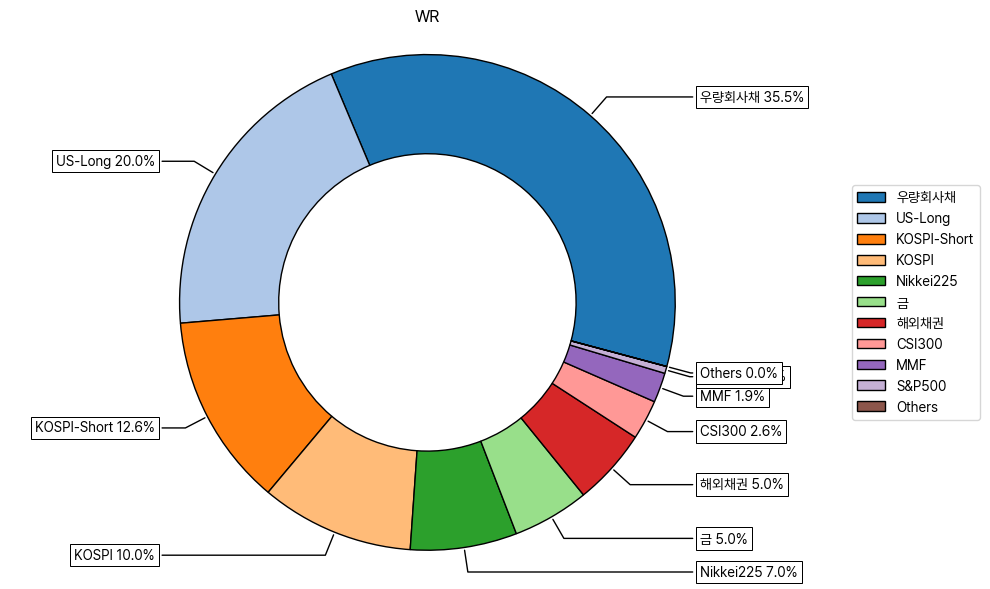

In [24]:
ax = rp.plot_pie(w=w, title='WR', others=0.001, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [25]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w], axis=1)
display(w_classes)

w_classes = w_classes.groupby(['Class']).sum()
display(w_classes)

,Class,weights
CSI300,FS,0.0259
KOSDAQ,DS,0.0000
KOSPI,DS,0.1000
KOSPI-Short,Inverse,0.1256
MMF,Cash,0.0194
Nikkei225,FS,0.0695
S&P500,FS,0.0045
STOXX50,FS,0.0000
US-Long,FX,0.2000
US-Short,FX,0.0000


,weights
Class,
Bond,0.4051
COM,0.0500
Cash,0.0194
DS,0.1000
FS,0.1000
FX,0.2000
Inverse,0.1256


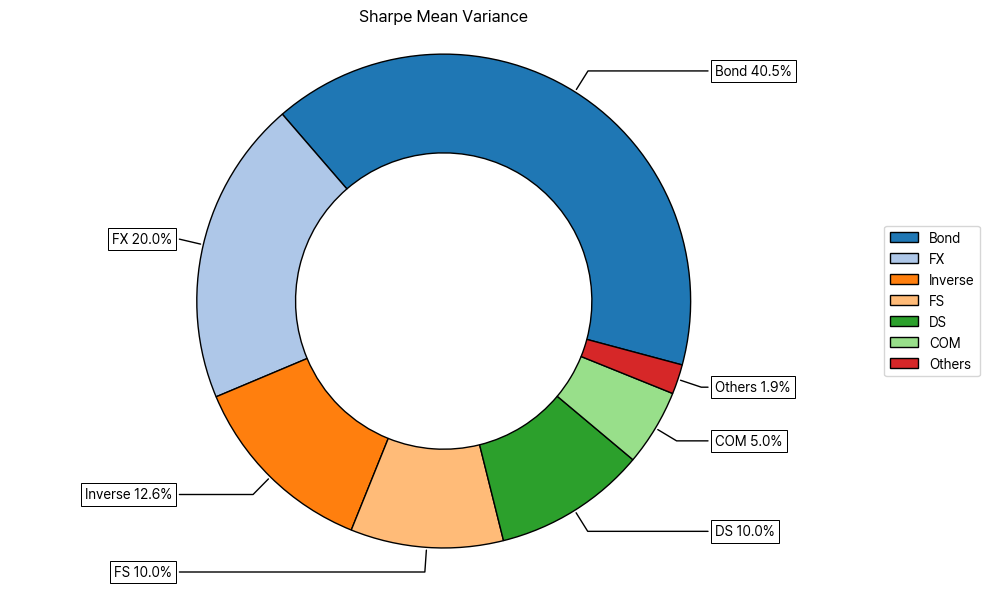

In [26]:
ax = rp.plot_pie(w=w_classes, title='Sharpe Mean Variance', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

In [27]:
points = 50 # Number of points of the frontier
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
display(frontier.T.head())

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
0,0.0299,0.0055,0.1181,0.2000,0.0152,0.0630,0.0071,0.0000,0.1643,0.0357,0.0000,0.0222,0.0508,0.2382,0.0500
1,0.0288,0.0000,0.1000,0.1261,0.0174,0.0666,0.0046,0.0000,0.2000,0.0000,0.0000,0.0070,0.0500,0.3495,0.0500
2,0.0059,0.0000,0.1000,0.1345,0.1688,0.0874,0.0068,0.0000,0.2000,0.0000,0.0000,0.0000,0.0687,0.1780,0.0500
3,0.0000,0.0000,0.1000,0.1654,0.1207,0.0970,0.0128,0.0000,0.2000,0.0000,0.0000,0.0000,0.1041,0.1500,0.0500
4,0.0000,0.0000,0.1000,0.1923,0.0498,0.1062,0.0181,0.0000,0.2000,0.0000,0.0000,0.0000,0.1335,0.1500,0.0500


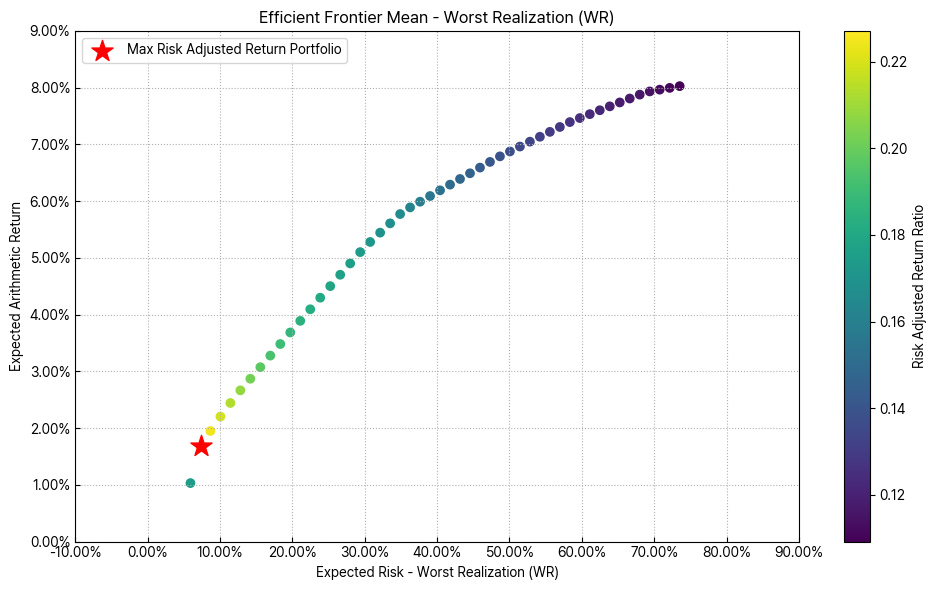

In [28]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

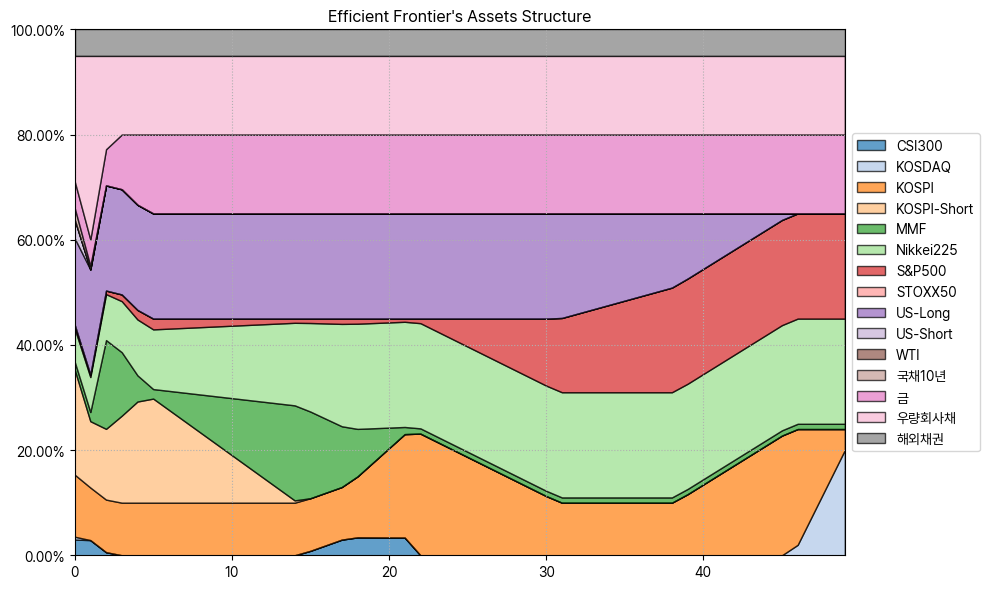

In [30]:
# Plotting efficient frontier composition
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [31]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
CSI300,0.30%,0.00%,0.19%,0.09%,0.21%,0.25%,0.16%,2.59%,7.37%,0.00%,0.53%,0.00%,1.65%
KOSDAQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.64%,0.00%,0.00%
KOSPI,10.00%,10.00%,10.00%,10.00%,10.00%,10.00%,10.00%,10.00%,10.00%,10.00%,9.36%,10.00%,10.00%
KOSPI-Short,7.08%,4.59%,7.81%,4.35%,7.96%,7.65%,12.80%,12.56%,10.52%,9.78%,14.21%,11.10%,13.42%
MMF,12.75%,11.42%,11.75%,11.83%,11.73%,10.77%,8.22%,1.94%,14.48%,15.20%,4.92%,12.47%,9.05%
Nikkei225,8.36%,7.65%,9.00%,7.61%,9.04%,10.19%,8.28%,6.95%,0.00%,6.46%,10.77%,8.01%,3.34%
S&P500,7.43%,11.35%,7.12%,11.12%,6.97%,6.35%,1.56%,0.45%,2.63%,7.57%,4.56%,5.13%,7.54%
STOXX50,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
US-Long,20.00%,20.00%,20.00%,20.00%,20.00%,20.00%,20.00%,20.00%,20.00%,20.00%,20.00%,20.00%,20.00%
US-Short,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

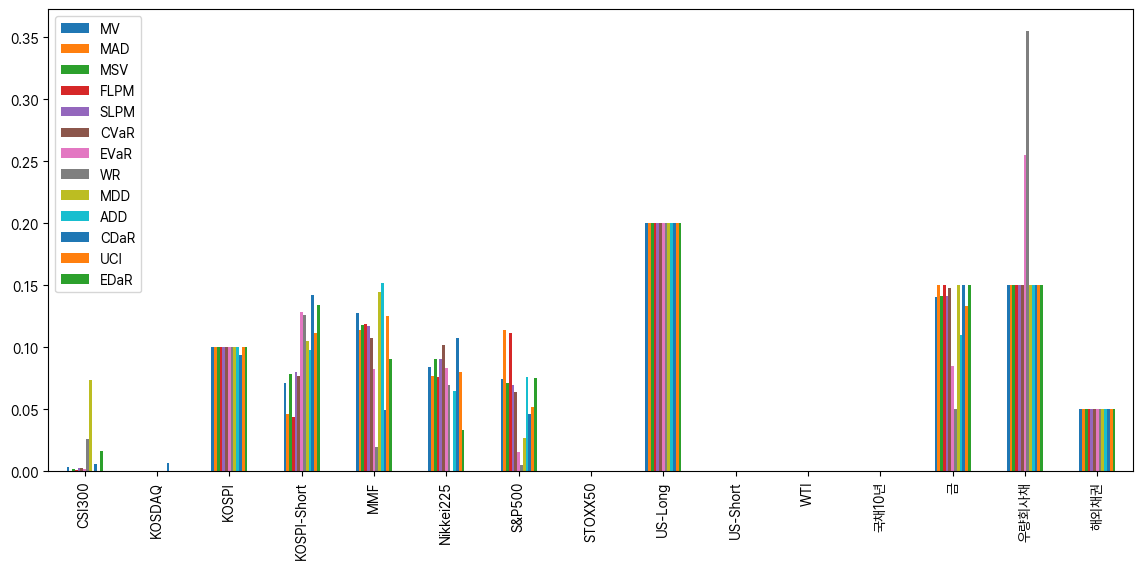

In [32]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [35]:
w_s['WR']

CSI300        0.0259
KOSDAQ        0.0000
KOSPI         0.1000
KOSPI-Short   0.1256
MMF           0.0194
Nikkei225     0.0695
S&P500        0.0045
STOXX50       0.0000
US-Long       0.2000
US-Short      0.0000
WTI           0.0000
국채10년         0.0000
금             0.0500
우량회사채         0.3551
해외채권          0.0500
Name: WR, dtype: float64

# 백테스트

In [36]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib as plt
import vectorbt as vbt # version=0.23.0
from vectorbt.portfolio.nb import order_nb, sort_call_seq_nb
from vectorbt.portfolio.enums import SizeType, Direction

import warnings

warnings.filterwarnings("ignore")
plt.rc('font', family='Pretendard')
pd.options.display.float_format = '{:.4f}'.format

In [37]:
CSI300 = pd.read_excel('000300perf_0531.xlsx', engine='openpyxl')
CSI300.set_index("日期Date", inplace=True)
CSI300.rename(columns={"收盘Close": "CSI300"}, inplace=True)
CSI300 = CSI300.rename_axis("Date")
CSI300 = CSI300['CSI300']

# Convert the index to datetime format
CSI300.index = pd.to_datetime(CSI300.index, format='%Y%m%d')
CSI300 = CSI300.to_frame()

In [38]:
# Date range
start = '2010-01-01'
end = '2023-05-31'

# Tickers of assets
ticker_labels = {
    'ticker': ['^KS200', '229200.KS', '^GSPC', '^STOXX50E', '^N225', '000300.SS', '148070.KS', '136340.KS', 'HYG', 'GC=F', 'CL=F', '114800.KS', '138230.KS', '139660.KS', '130730.KS'],
    'labels': ['KOSPI', 'KOSDAQ', 'S&P500', 'STOXX50', 'Nikkei225', 'CSI300', '국채10년', '우량회사채', '해외채권', '금', 'WTI', 'KOSPI-Short', 'US-Long', 'US-Short', 'MMF']
}

new_dict = dict(zip(ticker_labels["ticker"], ticker_labels["labels"]))

# Downloading data
data = yf.download(ticker_labels['ticker'], start = start, end = end)
data = data.loc[:,('Close', slice(None))]
data = data.rename(columns=new_dict)

data.columns = data.columns.droplevel(level=0)
data = data.drop('CSI300', axis=1)
data = data.merge(CSI300[['CSI300']], left_index=True, right_index=True, how='left')

# Print the merged DataFrame
data = data.sort_index(axis=1)
data = data.dropna()

assets = data.columns

[*********************100%***********************]  15 of 15 completed


In [15]:
data.describe()

,CSI300,KOSDAQ,KOSPI,KOSPI-Short,MMF,Nikkei225,S&P500,STOXX50,US-Long,US-Short,WTI,국채10년,금,우량회사채,해외채권
count,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000,1602.0000
mean,3985.1208,11856.0112,309.2377,6051.1486,101473.1929,23061.1297,3140.7577,3522.4510,12259.0262,10452.1785,60.0719,119200.3027,1518.0039,103553.5549,84.0176
std,623.1405,1998.4322,53.3689,1390.4016,457.0485,4032.0587,802.4854,392.2064,877.8007,739.5386,18.6985,5606.6990,280.7210,1341.3232,4.4666
min,2877.4700,7220.0000,199.2800,3675.0000,100505.0000,14952.0195,1859.3300,2385.8201,10790.0000,8255.0000,-37.6300,100580.0000,1050.8000,99525.0000,68.6300
25%,3481.8375,10236.2500,269.5125,4795.0000,101120.0000,19931.3501,2474.2450,3278.5775,11640.0000,10080.0000,47.3325,115962.5000,1267.0000,102501.2500,82.7050
50%,3890.4400,11497.5000,302.3050,6237.5000,101430.0000,22494.3350,2905.9250,3478.2350,12050.0000,10600.0000,56.9500,119665.0000,1459.2000,103840.0000,85.8200
75%,4255.9000,13618.7500,328.4825,7075.0000,101785.0000,27192.8052,3909.7899,3738.7775,12625.0000,10985.0000,70.4600,123343.7500,1796.2750,104620.0000,87.1600
max,5807.7200,17140.0000,440.4000,9180.0000,102765.0000,31328.1602,4793.5400,4408.5898,15205.0000,11785.0000,123.7000,130485.0000,2051.5000,105690.0000,88.9700


In [39]:
vbt.settings.returns['year_freq'] = '252 days'

num_tests = 3
ann_factor = data.vbt.returns(freq='D').ann_factor

def pre_sim_func_nb(sc, every_nth):
    # Define rebalancing days
    sc.segment_mask[:, :] = False
    sc.segment_mask[every_nth::every_nth, :] = True
    return ()


def pre_segment_func_nb(sc, find_weights_nb, rm, history_len, ann_factor, num_tests, srb_sharpe):
    if history_len == -1:
        # Look back at the entire time period
        close = sc.close[:sc.i, sc.from_col:sc.to_col]
    else:
        # Look back at a fixed time period
        if sc.i - history_len <= 0:
            return (np.full(sc.group_len, np.nan),)  # insufficient data
        close = sc.close[sc.i - history_len:sc.i, sc.from_col:sc.to_col]
    
    # Find optimal weights
    best_sharpe_ratio, weights = find_weights_nb(sc, rm, close, num_tests)
    srb_sharpe[sc.i] = best_sharpe_ratio
        
    # Update valuation price and reorder orders
    size_type = np.full(sc.group_len, SizeType.TargetPercent)
    direction = np.full(sc.group_len, Direction.LongOnly)
    temp_float_arr = np.empty(sc.group_len, dtype=np.float_)
    for k in range(sc.group_len):
        col = sc.from_col + k
        sc.last_val_price[col] = sc.close[sc.i, col]
    sort_call_seq_nb(sc, weights, size_type, direction, temp_float_arr)
    
    return (weights,)


def order_func_nb(oc, weights):
    col_i = oc.call_seq_now[oc.call_idx]
    return order_nb(
        weights[col_i], 
        oc.close[oc.i, oc.col],
        size_type=SizeType.TargetPercent, 
    )

In [40]:
import riskfolio as rp

def opt_weights(sc, rm, close, num_tests):
    # Calculate expected returns and sample covariance matrix
    close = pd.DataFrame(close, columns=assets)
    returns = close.pct_change().dropna()

    # Building the portfolio object
    port = rp.Portfolio(returns=returns)
    # Calculating optimum portfolio

    # Select method and estimate input parameters:

    method_mu='hist' # Method to estimate expected returns based on historical data.
    method_cov='hist' # Method to estimate covariance matrix based on historical data.

    port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

    # Estimate optimal portfolio:
    
    port.solvers = ['MOSEK']
    model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
    rm = rm # Risk measure used, this time will be variance
    obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist = True # Use historical scenarios for risk measures that depend on scenarios
    rf = 0 # Risk free rate
    l = 0 # Risk aversion factor, only useful when obj is 'Utility'

    w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
    weights = np.ravel(w.to_numpy())  
    shp = rp.Sharpe(w, port.mu, cov=port.cov, returns=returns, rm=rm, rf=0, alpha=0.05)

    return shp, weights

In [41]:
%%time

# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.
# 'UCI': Ulcer Index of uncompounded returns.


rms = ["MV", "CVaR", "EVaR", "WR", "CDaR"]

sharpe = {}
portfolio = {}

for i in rms:
    sharpe[i] = np.full(data.shape[0], np.nan)

    # Run simulation with a custom order function (Numba should be disabled)
    portfolio[i] = vbt.Portfolio.from_order_func(
        data,
        order_func_nb,
        pre_sim_func_nb=pre_sim_func_nb,
        pre_sim_args=(30,),
        pre_segment_func_nb=pre_segment_func_nb,
        pre_segment_args=(opt_weights, i, 252*4, ann_factor, num_tests, sharpe[i]),
        cash_sharing=True, 
        group_by=True,
        use_numba=False,
    )

CPU times: total: 6.5 s
Wall time: 9.53 s


In [19]:
vbt.settings['plotting']['layout']['width'] = 900
vbt.settings['plotting']['layout']['height'] = 400

def plot_allocation(rb_pf):
    # Plot weights development of the portfolio
    rb_asset_value = rb_pf.asset_value(group_by=False)
    rb_value = rb_pf.value()
    rb_idxs = np.flatnonzero((rb_pf.asset_flow() != 0).any(axis=1))
    rb_dates = rb_pf.wrapper.index[rb_idxs]
    fig = (rb_asset_value.vbt / rb_value).vbt.plot(
        trace_names=assets,
        trace_kwargs=dict(
            stackgroup='one'
        )
    )
    for rb_date in rb_dates:
        fig.add_shape(
            dict(
                xref='x',
                yref='paper',
                x0=rb_date,
                x1=rb_date,
                y0=0,
                y1=1,
                line_color=fig.layout.template.layout.plot_bgcolor
            )
        )
    fig.show_svg()
    
for i in rms:
    plot_allocation(portfolio[i])

<Axes: >

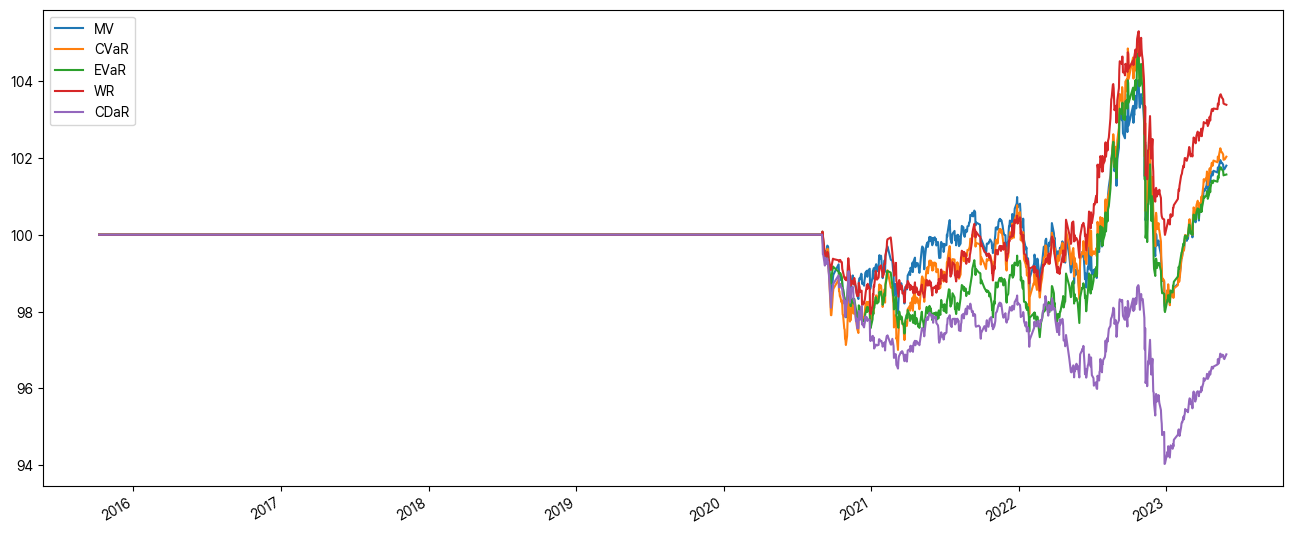

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,7))

values = pd.DataFrame([])
for i in rms:
    a = portfolio[i].value()
    values = pd.concat([values, a], axis=1)

values.columns = rms
values = pd.DataFrame(values)
values.plot(ax=ax)

In [43]:
stats = pd.DataFrame([])
for i in rms:
    a = portfolio[i].stats()
    stats = pd.concat([stats, a], axis=1)

stats.columns = rms
display(stats)

,MV,CVaR,EVaR,WR,CDaR
Start,2015-10-08 00:00:00,2015-10-08 00:00:00,2015-10-08 00:00:00,2015-10-08 00:00:00,2015-10-08 00:00:00
End,2023-05-30 00:00:00,2023-05-30 00:00:00,2023-05-30 00:00:00,2023-05-30 00:00:00,2023-05-30 00:00:00
Period,1602,1602,1602,1602,1602
Start Value,100.0000,100.0000,100.0000,100.0000,100.0000
End Value,101.7957,102.0286,101.5657,103.3790,96.8882
Total Return [%],1.7957,2.0286,1.5657,3.3790,-3.1118
Benchmark Return [%],22.7380,22.7380,22.7380,22.7380,22.7380
Max Gross Exposure [%],100.0000,100.0000,100.0000,100.0000,100.0000
Total Fees Paid,0.0000,0.0000,0.0000,0.0000,0.0000
Max Drawdown [%],5.6960,6.4798,6.4256,5.0304,5.9626
